## Modelos Não Supervisionados

Modelos de aprendizado não supervisionado são técnicas de machine learning que analisam dados sem **rótulos** ou respostas pré-definidas. Ou seja, o algoritmo não recebe exemplos do tipo “entrada → saída correta” conforme o modelo supervisionado, mas sim um conjunto de dados brutos e precisa identificar padrões, estruturas ou relações ocultas por conta própria.

Esses modelos são muito usados quando não se sabe exatamente o que procurar nos dados ou quando rotular informações é caro e demorado.

Esse tipo de aprendizado é comum em tarefas como agrupamento (clustering), onde dados semelhantes são organizados em grupos, e redução de dimensionalidade, que simplifica grandes volumes de dados mantendo suas características principais.

---

### Base

In [17]:
""" Obtenção dos dados """

from sklearn.datasets import load_iris

# Carregando o dataset Iris
iris = load_iris()
X = iris.data # sem rótulos

In [18]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Como não existem rótulos para serem comparados e treinado, modelos de aprendizado não supervisionados geralmente não se separam em dados de treinos e teste.

### K-Means

O K-Means é um algoritmo de aprendizado não supervisionado usado para **agrupamento de dados**. Ele funciona separando os dados em **clusters**, de forma que os elementos dentro de cada grupo sejam semelhantes.

O algoritmo define centros (centroides) para cada grupo e ajusta esses centros iterativamente para minimizar a distância entre os dados e o centro do seu respectivo cluster.

In [19]:
# Ignorando avisos
import warnings

warnings.filterwarnings("ignore")

In [20]:
""" Treinamento do modelo K-Means """

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def modelo_kmeans(X, k = 3):
    # Criando o modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Treinando o modelo
    kmeans.fit(X)

    # Obtendo os clusters atribuídos
    labels = kmeans.labels_

    # Visualização
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel("Comprimento da sépala")
    plt.ylabel("Largura da sépala")
    plt.title("Agrupamento com K-Means")
    plt.show()

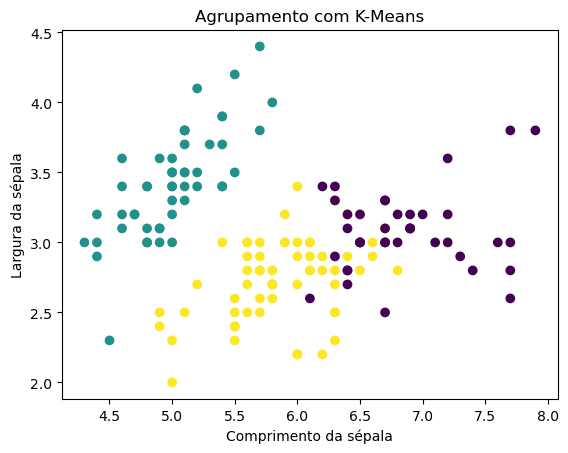

In [21]:
modelo_kmeans(X, 3)

Conforme o gráfico acima, podemos perceber os diferentes clusters com base nas cores e a proximidade deles.

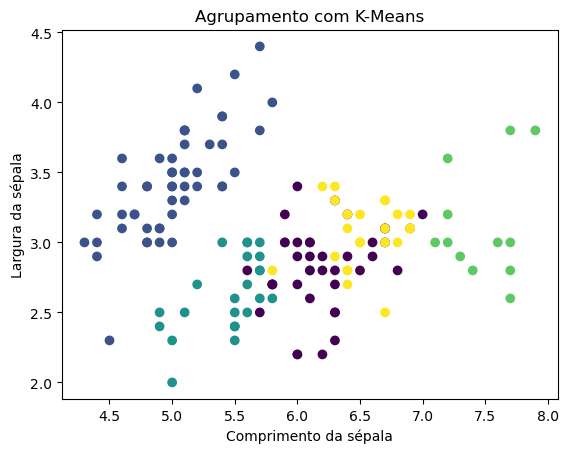

In [22]:
modelo_kmeans(X, 5)

Conforme observado, quanto maior o número de clusters, menos nítida se torna a separação entre os agrupamentos, dificultando a identificação dos clusters.

---

Algumas das formas de identificar um bom número de clusters incluem o uso do **Silhouette Score** e do **Método do Cotovelo**, que analisam a **dispersão dos pontos** e as distâncias entre eles para determinar o valor mais adequado de K. Esses métodos buscam encontrar uma segmentação que seja bem definida, equilibrando a qualidade do agrupamento sem torná-lo redundante.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Testando diferentes valores de K
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    score = silhouette_score(X, labels)
    print(f"K = {k} | Silhouette Score = {score:.3f}")

K = 2 | Silhouette Score = 0.681
K = 3 | Silhouette Score = 0.551
K = 4 | Silhouette Score = 0.498
K = 5 | Silhouette Score = 0.493
K = 6 | Silhouette Score = 0.368
K = 7 | Silhouette Score = 0.354
K = 8 | Silhouette Score = 0.345
K = 9 | Silhouette Score = 0.316
K = 10 | Silhouette Score = 0.301
K = 11 | Silhouette Score = 0.269
K = 12 | Silhouette Score = 0.263
K = 13 | Silhouette Score = 0.260
K = 14 | Silhouette Score = 0.263
K = 15 | Silhouette Score = 0.253


No Silhouette Score, é possível observar que o melhor resultado ocorre em K = 2, seguido por uma queda em K = 3. A partir desse ponto, os valores diminuem de forma contínua, indicando perda na qualidade dos agrupamentos.

Assim, os valores 2 ou 3 podem ser considerados os mais adequados para esse modelo, dependendo do nível de detalhamento desejado.

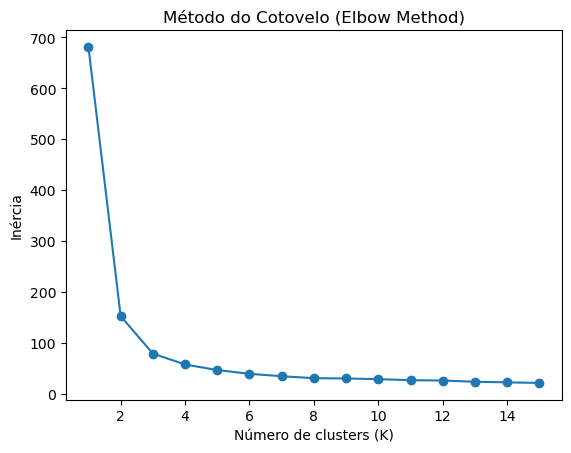

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para armazenar a inércia
inertias = []

# Testando diferentes valores de K
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(range(1, 16), inertias, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo (Elbow Method)")
plt.show()

O Método de Elbow segue uma linha semelhante ao do Silhouette Score porém de uma forma mais visual, onde podemos ver a queda acentuada da inércia no K = 2 e K = 3.

### Clustering Hierárquico

O clustering hierárquico é uma técnica de aprendizado não supervisionado usada para agrupar dados com base na similaridade entre eles, sem a necessidade de definir previamente o número de grupos. Ele cria uma estrutura em forma de árvore, chamada dendrograma, que mostra como os dados vão sendo agrupados.

Existem dois tipos principais de clustering hierárquico:  
    - **Aglomerativo**: que começa com cada dado em seu próprio grupo e vai unindo os mais semelhantes até formar um único grupo.  
    - **Divisivo**: que faz o processo inverso, começando com todos os dados juntos e separando-os gradualmente.  

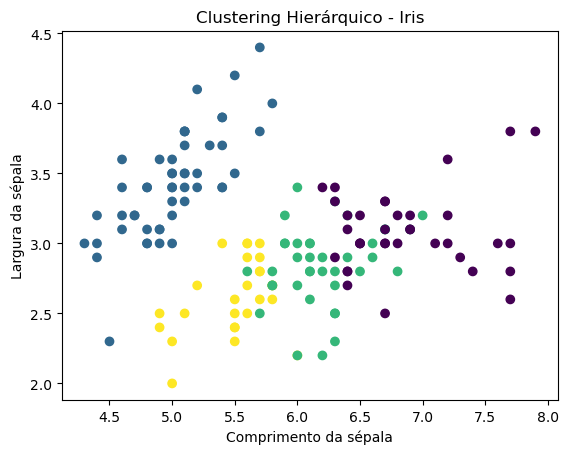

In [25]:
""" Treinamento do modelo Hierárquico """

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# criar o modelo
modelo = AgglomerativeClustering(
    distance_threshold=5.0, # distancia entre os pontos para considerar o aglomerado
    n_clusters=None,
    linkage='ward'
)

# treinar o modelo
labels = modelo.fit_predict(X)

# visualizar
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Comprimento da sépala")
plt.ylabel("Largura da sépala")
plt.title("Clustering Hierárquico - Iris")
plt.show()

Quando não definimos o campo n_cluster com o numero de clusters a ser definido, devemos setar a propriedade distance_threshold que delimita a distancia para serem definidos os clusters.

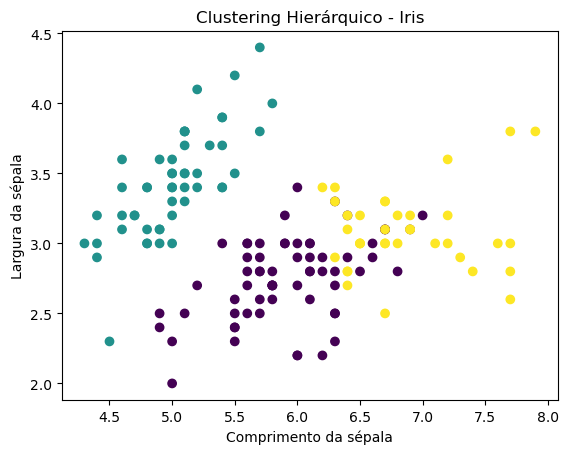

In [26]:
""" Treinamento do modelo Hierárquico """

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# criar o modelo
modelo = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
    linkage='ward'
)

# treinar o modelo
labels = modelo.fit_predict(X)

# visualizar
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Comprimento da sépala")
plt.ylabel("Largura da sépala")
plt.title("Clustering Hierárquico - Iris")
plt.show()

Quando o numero de clusters ja é conhecido, é possível utiliza-lo também.

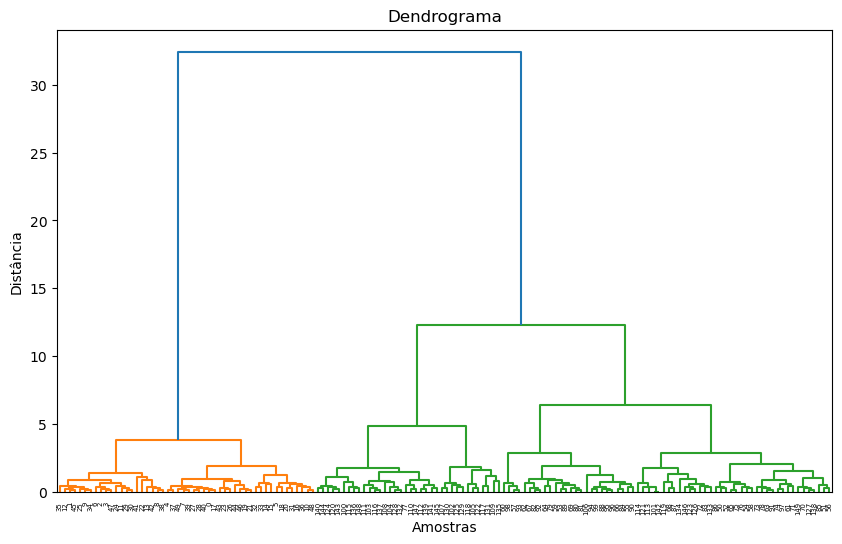

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Criar a matriz de ligação (linkage)
Z = linkage(X, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrograma")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

Com o dendograma é possível visualizar a distancia que seria aplicado **distance_threshold** e a quantidade de clusters (ramificação)

### PCA

PCA (Principal Component Analysis, ou Análise de Componentes Principais) é uma técnica de redução de dimensionalidade. Ela transforma um conjunto de variáveis correlacionadas em um novo conjunto de variáveis chamadas **componentes principais**, que são combinações lineares das variáveis originais. 

Esses componentes são ordenados de forma que os primeiros concentram a maior parte da variância, permitindo representar o conjunto original com menos dimensões.

Na prática, o PCA é usado para simplificar dados, reduzir ruído, acelerar algoritmos de aprendizado e facilitar visualizações, especialmente em dados de alta dimensão.

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir de 4 para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame
df_pca = pd.DataFrame(
    X_pca,
    columns=["Componente Principal 1", "Componente Principal 2"]
)

print(df_pca.head())
print("Variância explicada:", pca.explained_variance_ratio_)

   Componente Principal 1  Componente Principal 2
0               -2.264703                0.480027
1               -2.080961               -0.674134
2               -2.364229               -0.341908
3               -2.299384               -0.597395
4               -2.389842                0.646835
Variância explicada: [0.72962445 0.22850762]


Com o PCA transformamos 4 variáveis em 2, onde foram chamas de Componente Principal 1 e 2, com isso trabalhamos com menos variáveis tornando mais rápido e mais simples dependendo do números de features.

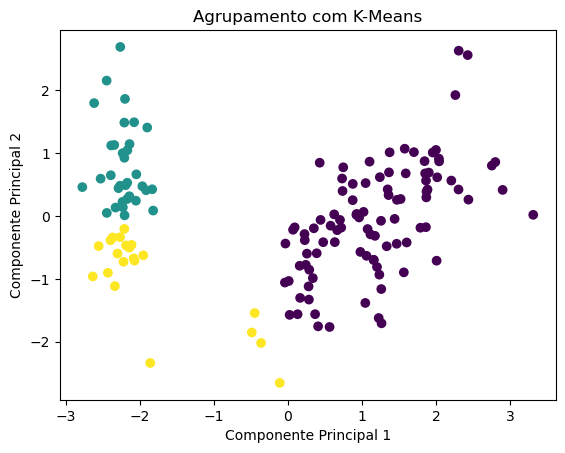

In [29]:
# Treinando o modelo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Visualização
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Agrupamento com K-Means")
plt.show()

Conforme o gráfico acima, podemos perceber que utilizando o modelo K-Means com os dados vindos do PCA, ele manteve os agrupamentos proximos porém acentuando a divisão entre eles.